## Transfer Learning Resnet152v2 using Keras

In [45]:
import tensorflow as tf
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [46]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\bhuwa\miniconda3_1\envs\tf\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [47]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [48]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset new/Train'
valid_path = 'Dataset new/Test'


In [49]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [19]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of output classes
folders = glob('Dataset new/Train/*')

In [21]:
Aiphids_folder = glob('Dataset new/Test/Aiphids/*')
Army_worms_folder = glob('Dataset new/Test/Army worm/*')
Bacterial_Blight_folder = glob('Dataset new/Test/Bacterial Blight/*')
Healthyfolder = glob('Dataset new/Test/Healthy/*')
Powdery_Mildew_folder = glob('Dataset new/Test/Powdery Mildew/*')
Target_spot_folder = glob('Dataset new/Test/Target spot/*')

In [22]:
img_arr = [Aiphids_folder, Army_worms_folder, Bacterial_Blight_folder, Healthyfolder, Powdery_Mildew_folder, Target_spot_folder] 

In [23]:
actual = []  
for i in range(6):
    curr = [i]*len(img_arr[i])
    actual.extend(curr)
print(actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [24]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset new/Train',
                                                 target_size = (224, 224),
                                                 batch_size =32 ,
                                                 class_mode = 'categorical')

Found 2400 images belonging to 6 classes.


In [30]:
test_set = test_datagen.flow_from_directory('Dataset new/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 237 images belonging to 6 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\bhuwa\miniconda3_1\envs\tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
75/75 [==============================] - 55s 600ms/step - loss: 1.7976 - accuracy: 0.8125 - val_loss: 0.4028 - val_accuracy: 0.9620
Epoch 2/20
75/75 [==============================] - 27s 362ms/step - loss: 0.8644 - accuracy: 0.9196 - val_loss: 0.2635 - val_accuracy: 0.9662
Epoch 3/20
75/75 [==============================] - 27s 354ms/step - loss: 0.5299 - accuracy: 0.9500 - val_loss: 0.3346 - val_accuracy: 0.9831
Epoch 4/20
75/75 [==============================] - 29s 379ms/step - loss: 0.5983 - accuracy: 0.9508 - val_loss: 0.3667 - val_accuracy: 0.9789
Epoch 5/20
75/75 [==============================] - 28s 377ms/step - loss: 0.5526 - accuracy: 0.9563 - val_loss: 0.3246 - val_accuracy: 0.9873
Epoch 6/20
75/75 [==============================] - 28s 372ms/step - loss: 0.4025 - accuracy: 0.9679 - val_loss: 0.1865 - val_accuracy: 0.9873
Epoch 7/20
75/75 [==============================] - 28s 370ms/step - loss: 0.3480 - accuracy: 0.9712 - val_loss: 0.0765 - val_accuracy: 0.9916

In [32]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet152V2_GPU.h5')

C:\Users\bhuwa\miniconda3_1\envs\tf\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [33]:
import matplotlib.pyplot as plt

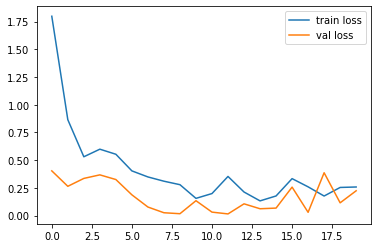

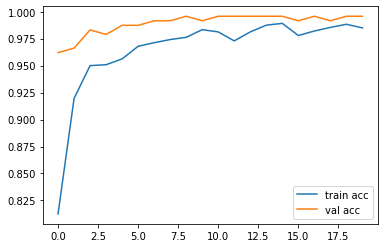

<Figure size 432x288 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:

y_pred = model.predict(test_set)


In [36]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.7054786e-33, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 7.3980044e-28],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_pred

array([0, 0, 2, 1, 2, 4, 4, 3, 3, 5, 2, 5, 0, 0, 3, 4, 0, 0, 2, 3, 3, 1,
       2, 4, 0, 1, 1, 5, 3, 1, 5, 5, 3, 5, 2, 0, 5, 4, 1, 2, 1, 0, 4, 3,
       1, 0, 2, 3, 0, 3, 0, 2, 0, 5, 2, 5, 2, 5, 2, 3, 1, 3, 1, 1, 0, 2,
       1, 2, 3, 1, 4, 0, 3, 4, 0, 3, 4, 5, 2, 0, 4, 5, 0, 5, 3, 0, 1, 1,
       1, 1, 5, 1, 4, 5, 3, 4, 2, 3, 3, 1, 5, 3, 0, 5, 4, 4, 2, 1, 3, 2,
       4, 3, 5, 0, 1, 2, 3, 2, 2, 5, 0, 5, 1, 2, 0, 5, 5, 3, 2, 1, 3, 4,
       2, 4, 0, 3, 3, 4, 0, 4, 2, 2, 0, 4, 1, 2, 3, 2, 1, 4, 0, 4, 4, 0,
       2, 0, 4, 3, 1, 3, 0, 2, 5, 5, 1, 3, 5, 2, 2, 1, 0, 5, 1, 4, 1, 4,
       5, 4, 2, 5, 5, 2, 4, 5, 3, 2, 4, 1, 5, 5, 1, 0, 5, 4, 2, 1, 2, 5,
       5, 5, 1, 0, 3, 4, 0, 1, 1, 4, 5, 0, 0, 2, 4, 4, 1, 0, 5, 5, 1, 0,
       1, 5, 5, 3, 5, 3, 4, 4, 3, 2, 3, 4, 2, 0, 3, 3, 1], dtype=int64)

In [39]:
 def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    x = x / 255  # Scaling
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    preds = np.argmax(preds, axis=1)
    return preds


In [40]:
test_values = []
for i in img_arr:
    for j in i:
        test_values.append(model_predict(j,model))

In [41]:
print(test_values)

[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64),

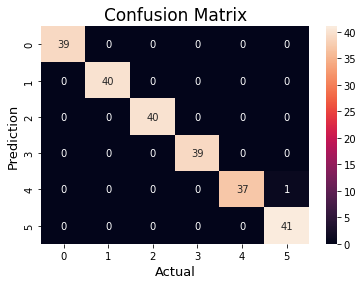

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

true_labels = test_set.classes


#cm = confusion_matrix(true_labels, y_pred)
cm = confusion_matrix(actual,test_values)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
accuracy_score(actual,test_values, normalize=True)

0.9957805907172996

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [90]:
model=load_model('model_resnet152V2_GPU.h5')

In [91]:
img_data

NameError: name 'img_data' is not defined

In [28]:
img=image.load_img('Dataset/val/diseased cotton leaf/dis_leaf (7)_iaip.jpg',target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[ 91.,  92.,  84.],
        [ 97.,  98.,  90.],
        [ 96.,  97.,  89.],
        ...,
        [156., 146., 134.],
        [162., 152., 140.],
        [168., 158., 146.]],

       [[ 82.,  83.,  75.],
        [ 91.,  92.,  84.],
        [ 92.,  93.,  85.],
        ...,
        [156., 146., 134.],
        [171., 161., 149.],
        [177., 167., 155.]],

       [[ 70.,  71.,  63.],
        [ 81.,  82.,  74.],
        [ 85.,  86.,  78.],
        ...,
        [165., 155., 143.],
        [170., 160., 148.],
        [186., 176., 164.]],

       ...,

       [[174., 185., 129.],
        [182., 190., 143.],
        [163., 164., 132.],
        ...,
        [107., 143.,  82.],
        [107., 138.,  78.],
        [103., 134.,  74.]],

       [[175., 197., 132.],
        [174., 191., 136.],
        [167., 175., 136.],
        ...,
        [108., 143.,  87.],
        [107., 142.,  84.],
        [ 99., 134.,  76.]],

       [[170., 192., 127.],
        [166., 183., 128.],
        [157., 1

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[3.0653393e-01, 2.6646352e-09, 5.7741558e-09, 6.9346607e-01]],
      dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])